# Introduction

For our project to find what neighborhood is the best in Pittsburgh, we have decided to look at the factor of which neighborhood is the best for hosting a business. We are all planning on going into a field, whether it be computer science or information science, in which we plan on working mainly in an office setting. Due to this, we thought it would be interesting to find the safest neighborhood for a business, by looking at the worst factors for it. This may sound confusing, but its really not. We decided to look at fire data, illegal dumping sites, and non-traffic related citations in order to see where the safest neighborhood to start a business is. Whichever neighborhood is the least in our three statistics will be the best neighborhood to host a business.

# Fire Incidents in the City of Pittsburgh - Cameron Klosky

link: https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh

So for my dataset, I decided to look at fire data in Pittsburgh. The data was provided by the Fire Bureau and the Department of Public Safety in Pittsburgh. Important information that is included in it is the type of incident (cooking fire, building fire, trash fire, etc.), where is was located - both neighborhood and specific address, when it happened, and the alarm time. 

For my look into the best neighborhood in Pittsburgh, I will be using this dataset to see what neighborhood has the least fires. 



Here is what the file looks like:

In [11]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

fire = pd.read_csv("FireData.csv")
fire.head()

,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",2016-04-21T05:01:04,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",2018-03-13T08:34:43,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",2018-03-13T11:54:23,0,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",2017-05-31T08:39:47,0,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",2018-03-09T10:26:42,1,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607


In [12]:
print(fire['neighborhood'].nunique())
fire['neighborhood'].unique()

91


array([nan, 'Fineview', 'Fairywood', 'South Side Flats',
       'Allegheny Center', 'Lincoln-Lemington-Belmar', 'Carrick',
       'Beechview', 'Allentown', 'Beltzhoover', 'Crafton Heights',
       'Homewood North', 'Squirrel Hill South', 'Perry North',
       'Bedford Dwellings', 'Homewood South', 'East Allegheny',
       'Crawford-Roberts', 'Sheraden', 'Middle Hill', 'Strip District',
       'East Hills', 'Garfield', 'Greenfield', 'North Shore',
       'Spring Hill-City View', 'Central Business District', 'Upper Hill',
       'Manchester', 'Overbrook', 'Polish Hill', 'Central Lawrenceville',
       'Brookline', 'Marshall-Shadeland', 'North Oakland',
       'South Oakland', 'Homewood West', 'East Liberty', 'Hazelwood',
       'Squirrel Hill North', 'Friendship', 'West Oakland',
       'Terrace Village', 'Brighton Heights', 'Troy Hill', 'Windgap',
       'Knoxville', 'Upper Lawrenceville', 'Arlington', 'Elliott',
       'South Side Slopes', 'Bloomfield', 'Perry South',
       'Central N

Here are the individual neighborhoods that are provided through the dataset.

This graph below shows the neighborhoods and the amount of fires that have been reported in them.

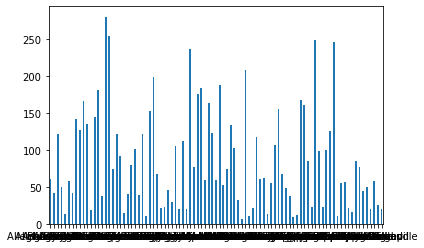

In [3]:
fire["neighborhood"].value_counts().sort_index().plot(kind='bar', rot=0)

Obviously, this is hard to read, so for simplicities sake, here are the neighborhoods with the least amounts of fire reported.

In [4]:
fire["neighborhood"].value_counts()[81:91]

Swisshelm Park          16
Chartiers City          15
Arlington Heights       13
Oakwood                 13
Ridgemont               12
St. Clair               11
East Carnegie           11
Mt. Oliver              11
Regent Square            9
Mount Oliver Borough     6
Name: neighborhood, dtype: int64

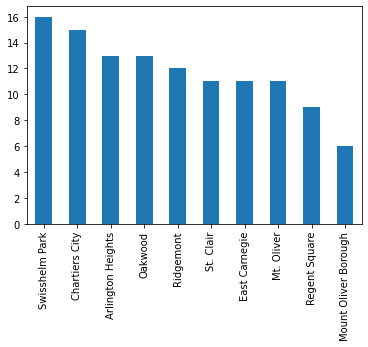

In [5]:
fire["neighborhood"].value_counts()[81:91].plot(kind='bar', rot=90)

From this we can see that the Mount Oliver Borough, located just a few miles south from Duquesne University, has the least number of fire incidents reported at six, followed by Regent Square (9), and Mt. Oliver (11), East Carnegie (11), and St. Clair (11) tied for 3.

To really prove this though, I also created a shapefile to show where the density of the most calls are coming from.

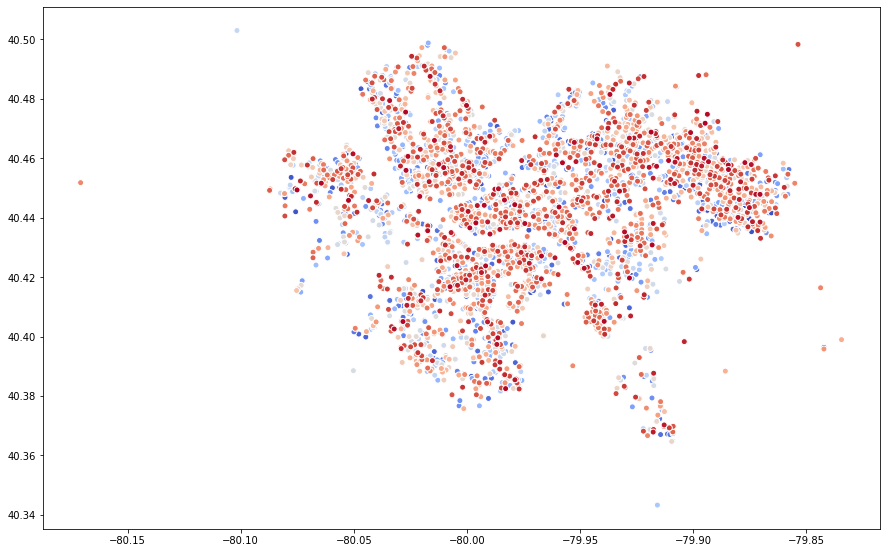

In [14]:
fires = geopandas.read_file("Data/fire.shp") 
fires.plot(cmap = 'coolwarm',
           edgecolor = "white",
           legend = True,
           legend_kwds={'label': "Density of Fires"},
           figsize=(15,10),
           missing_kwds={"color": "lightgrey"}
          )

From this graph, one can see that the Mount Oliver Borough, located at roughly -79.98, 40.42 is mainly a white area, with a few datapoints around it. Also to note, Mt. Oliver and St. Clair, where the 3rd least amount of fire incidents have occured according to the bargraph, are directly to the right of Mount Oliver Borough. They also tend to the low side in density, making that area as a whole look like a better spot to live in Pittsburgh.

From this, I also decided to look at what type of fires are occuring in Mount Oliver Borough to see if it is safe for a business.

In [9]:
item_query_mask = fire['neighborhood'] == "Mount Oliver Borough"
neighborhood_query_mask = fire[item_query_mask]
neighborhood_query_mask

,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
816,F150054723,111.0,Building fire,"1600 BLOCK ARLINGTON AVE, PITTSBURGH PA 15210",2015-07-14T20:52:05,1,231EN22,1706.0,Mount Oliver Borough,NaN,0.0,4.200330e+10,0.0,0.0,3.0,Mt Oliver,40.418452,-79.988197
2558,F140031468,151.0,"Outside rubbish, trash or waste fire","600 BLOCK OTTILLIA ST, PITTSBURGH PA 15210",2014-05-03T19:15:21,0,231EN22,1607.0,Mount Oliver Borough,NaN,0.0,4.200348e+10,0.0,0.0,3.0,Mt Oliver,40.409860,-79.981186
2607,F140034532,132.0,Road freight or transport vehicle fire,"600 BLOCK OTTILLIA ST, PITTSBURGH PA 15210",2014-05-15T20:05:49,0,231EN22,1607.0,Mount Oliver Borough,NaN,0.0,4.200348e+10,0.0,0.0,3.0,Mt Oliver,40.409860,-79.981186
6520,F190084205,151.0,"Outside rubbish, trash or waste fire","1700 BLOCK ARLINGTON AVE, PITTSBURGH PA 15210",2019-10-04T04:12:51,0,231EN22,1706.0,Mount Oliver Borough,3.0,0.0,4.200317e+10,0.0,0.0,NaN,4-6,40.417619,-79.986436
6776,F200014168,150.0,"Outside rubbish fire, Other","S 18TH ST & ARLINGTON AVE, PITTSBURGH PA 15210",2020-02-21T00:47:27,0,231EN22,4810.0,Mount Oliver Borough,3.0,0.0,4.200317e+10,0.0,0.0,NaN,4-6,40.417640,-79.986461
6840,F200020853,111.0,Building fire,"1700 BLOCK ARLINGTON AVE, PITTSBURGH PA 15210",2020-03-16T21:27:54,1,231EN22,1706.0,Mount Oliver Borough,3.0,0.0,4.200317e+10,0.0,0.0,NaN,4-6,40.417619,-79.986436


From all this data, I will conclude that Mount Oliver Borough the best neighborhood in Pittsbrugh to host a business, since it has the least number of fires reported, it is in the least dense fire area around Mt. Oliver and St. Clair, and only 2 of the 6 fires reported are actual building fires. 

# Illegal Dumping in Pittsburgh - Brenden Vaccaro
As a metric, our group decided to look for bad activities and with it we would find the lowest amount of illegal activities and overall accidents.
For my dataset, I chose to look over illegal dump site activity.
The best neighborhood for this dataset is the one that allows for businesses to set up and succeed.


## About the Dataset
1. Who submitted it? Josh Feldmiller, and the link to the data is https://data.wprdc.org/dataset/allegheny-county-illegal-dump-sites
2. What is the dataset? It is a csv containing information on the illegal dump sites in different neighborhoods of Allegheny County.
3. Why is this dataset useful? It contains in depth information regarding illegal dump sites as well as how many estimated tons of illegal resources are dumped.

I start by reading in the dataset as a pandas DataFrame, and instantly convert the column containing the data I need into a column consisting of floats rather than strings.
Finally, I display the head of the data.

In [15]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

data = pd.read_csv("illegaldumpsites.csv")
data['estimated_tons'] = pd.to_numeric(data['estimated_tons'], errors='coerce')
data = data.drop(data[(data['City'] != 'Pittsburgh')].index)
data.head()

,site_name,Status,City,Neighborhood,estimated_tons,location_description,latitude,longitude,Unnamed: 8
0,St. Martin Street,Surveyed,Pittsburgh,Allentown,0.5,NaN,40.42221971,-79.99022525,NaN
1,Brosville Street,Surveyed,Pittsburgh,Allentown,3.0,NaN,40.42370101,-79.98657393,NaN
2,McCain Street,Surveyed,Pittsburgh,Allentown,1.0,NaN,40.42427063,-79.99022675,NaN
3,Ceres Way,Surveyed,Pittsburgh,Allentown,0.5,NaN,40.42327242,-79.99248958,NaN
4,Eureka Street,Completed,Pittsburgh,Allentown,0.1,NaN,40.42372131,-79.99478912,NaN


In [16]:
neighborhoods = pd.DataFrame(columns=["Neighborhood", "Tons"])
neighborhoods["Neighborhood"] = data["Neighborhood"]
neighborhoods["Tons"] = data["estimated_tons"]

neighborhoods.head(25)

,Neighborhood,Tons
0,Allentown,0.5
1,Allentown,3.0
2,Allentown,1.0
3,Allentown,0.5
4,Allentown,0.1
5,Allentown,5.0
6,Allentown,0.3
7,Arlington,3.0
8,Arlington,4.0
9,Arlington,2.5


I take the simplified dataset and group the neighborhoods by those that have the same name and take the sum of the estimated amount illegally dumped for each neighborhood.
Since it has some unknown values I drop those since they are not actual neighborhoods.

In [17]:
neighborhoods = neighborhoods.groupby('Neighborhood').sum()

In [18]:
neighborhoods_sorted = neighborhoods.sort_values("Tons", ascending=True)
#newData = neighborhoods_sorted.drop(index = ['Partially', 'To Be Determined'])
neighborhoods_sorted.head(30)

,Tons
Neighborhood,
Springdale,0.0
East Liberty,0.0
Strip District,0.3
Point Breeze North,0.3
Homewood West,0.5
Banksville,1.0
Bedford Dwellings,1.0
West Wood,1.0
Bluff,1.0


Finally, I create a bar chart showing the data sorted in ascending order.
This chart shows the neighborhoods with the lowest amount of illegally dumped items.

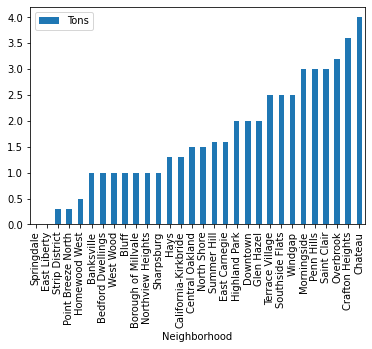

In [19]:
neighborhoods_sorted.iloc[:30].plot(kind='bar')

Through this data, I find that the lowest amount of trash dumped is in Springdale and East Liberty.

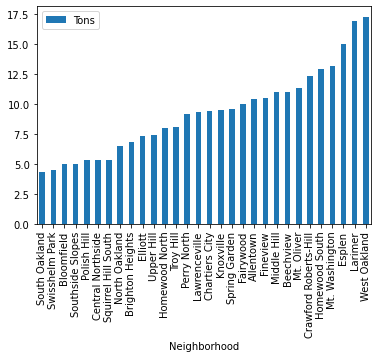

In [20]:
neighborhoods_sorted.iloc[30:60].plot(kind='bar')

In conclusion, by going through the data regarding Illegal Dumping in Pittsburgh, I have decided that East Liberty is overall the best place for a business to be established with the Springdale coming second.

This makes sense since overall the East Liberty is a place in which lots of businesses can be found since it allows for lots of people to walk around and find what they are looking for while allowing businesses to thrive since they can continue to bring in customers.

# Number of Non- Traffic Related Citations   - Robert Exley

Non-traffic citations, such as citations for disorderly conduct, loitering, or noise violations, can have negative impacts on a neighborhood. These types of citations can lead to increased tensions and strained relationships between residents and law enforcement. Additionally, they can be detrimental to a neighborhood's reputation and create a negative perception in the eyes of outsiders. This, in turn, can negatively impact property values and make it more difficult for businesses to attract customers or for residents to attract new neighbors. Furthermore, excessive non-traffic citations can lead to a disproportionate impact on certain groups, such as minorities or low-income individuals, which can contribute to further inequality and social unrest. Overall, while citations are necessary to maintain law and order, it is important to strike a balance between enforcing the law and ensuring that communities feel safe and supported.

In [21]:
import geopandas as gpd
import pandas as pd
nidata = gpd.read_file('Data/Neighborhoods_.shp')

In [22]:

crime = gpd.read_file('t.csv')
name_counts = {}
for index, row in crime.iterrows():
    name = row['NEIGHBORHOOD']
    if name in name_counts:
        name_counts[name] += 1
    else:
        name_counts[name] = 1
for name, count in name_counts.items():
    print(f'{name}: {count}')

North Oakland: 192
Allegheny Center: 155
Homewood South: 214
Upper Lawrenceville: 34
Golden Triangle/Civic Arena: 42
Lower Lawrenceville: 30
South Side Flats: 3269
East Liberty: 216
Point Breeze: 51
Central Oakland: 650
Brookline: 300
Beechview: 148
Bluff: 137
Hazelwood: 263
Overbrook: 54
Knoxville: 225
Glen Hazel: 28
Carrick: 411
Northview Heights: 63
Strip District: 98
Friendship: 16
Arlington: 82
Lincoln-Lemington-Belmar: 134
East Allegheny: 342
Squirrel Hill North: 167
East Hills: 142
Shadyside: 295
Crawford-Roberts: 95
Marshall-Shadeland: 113
North Shore: 541
Elliott: 126
Homewood West: 46
Chateau: 59
Greenfield: 149
Allentown: 179
South Oakland: 118
South Side Slopes: 171
Bloomfield: 141
Spring Hill-City View: 51
California-Kirkbride: 31
West Oakland: 60
: 196
Larimer: 150
Mount Washington: 311
South Shore: 50
Brighton Heights: 128
Upper Hill: 25
Sheraden: 251
Beltzhoover: 78
Westwood: 31
Squirrel Hill South: 262
East Carnegie: 22
Terrace Village: 37
Perry South: 72
Morningside: 

Above I have created a dictionary with all of the neighborhoods. Everytime a neighborhood emerges with an incident, I have incremented the number of crimes. The dictionary contains the amount of crimes that are associated with each neighborhood. 

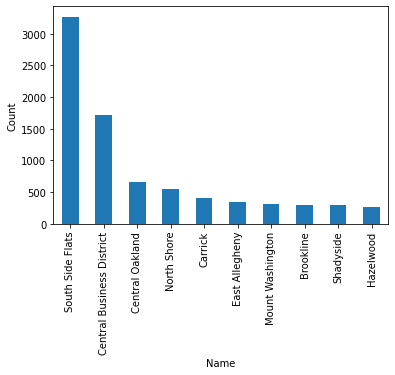

In [23]:
import matplotlib.pyplot as plt
sorted_name_counts = sorted(name_counts.items(), key=lambda x: x[1], reverse=True)
top_name_counts = dict(sorted_name_counts[:10])
top_name_counts_df = pd.DataFrame.from_dict(top_name_counts, orient='index', columns=['count'])
top_name_counts_df.plot(kind='bar', legend=None)
plt.xlabel('Name')
plt.ylabel('Count')
plt.show()

This bar graphs illustrates the neighborhood that have the most non-traffic related citations. In conclusion it is clear that the South Side Flats contain the most citations. 

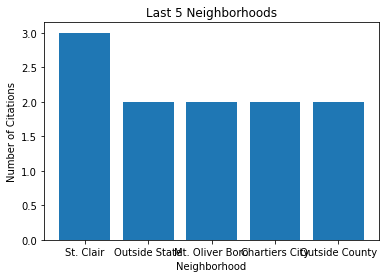

In [30]:
name_counts_series = pd.Series(name_counts)


sorted_series = name_counts_series.sort_values(ascending=False)
last_5 = sorted_series.tail(5)
plt.bar(last_5.index, last_5.values)
# Set the title and axis labels
plt.title('Last 5 Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Citations')
plt.show()

On the flip side, St. Clair, Mount Oliver Borough, and Chartiers have the least amount of citations therefore making them the best neighborhood to start a business based off of my dataset.

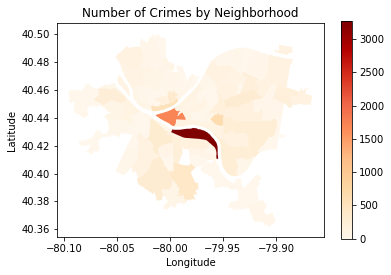

In [29]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
nidata = gpd.read_file('Data/Neighborhoods_.shp')
nidata['Crime_Counts'] = 0
for index, row in nidata.iterrows():
    name = row['hood']
    if name in name_counts:
        count = name_counts[name]
        nidata.loc[index, 'Crime_Counts'] = count


nidata.plot(column='Crime_Counts', cmap='OrRd', legend=True)
plt.title('Number of Crimes by Neighborhood')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Based on the data, the BEST neighborhoods include St Clair, Mt Oliver Borough, and Chartiers City because these neighborhoods have the least amount of the non traffic citation which include public intoxication, assualt, and underage possession of alcohol. The WORST are South Side Slopes, Central Business District, and Central Oakland which have the most of these citations.

# Conclusion

In order to determine the best neighborhood from the datasets, we looked at the which neighborhood showed up the most as the least prevalent in each of our respective categories (fires, dumping sites, and amount of citations). From this, we noticed a common trend of the area south of Duquesne, being Mount Oliver Borough, Mt. Oliver, and St. Clair all showing up as the lowest on our datasets. 

For Cameron's fire dataset, Mount Oliver Borough showed up as the least amount of fire incidents reported, with Mt. Oliver and St. Clair coming in tied at third.

For Brendens dump site dataset, Springdale, East Liberty and the Strip District had the least amount of dumps reported. Of course this does not support our claim, but we did notice from his data that St. Clair and Mt. Oliver were towards the lower middle of his dataset.

For Roberts non-traffic citations dataset, Mount Oliver Borough and St. Clair also showed up at the top of his list for the least number of citations.

In conclusion to all of this data, we have decided that Mount Oliver Borough is the safest place to host a business in all of Pittsburgh, therefore it is the best neighborhood as well. The area all around Mount Oliver Borough (St. Clair and Mount Oliver) shows up on all of our data around the least fires/citations/dumping sites as well, which also furthers our point that this is the best area to host a business in Pittsburgh. 